# load the data

In [1]:
import csv
import pandas as pd
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import MultipleLocator
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# The German Traffic Sign Recognition Benchmark
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
# grayscale type image can not be shown by plt.imshow function
# image array: for int: [0..255], for float: [0..1]
def readTrafficSigns(rootpath, img_size=(28,28), val_size=0.2, grayscale=True):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images_train = [] # images
    images_val = [] # images
    
    labels_train = [] # corresponding labels
    labels_val = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        imglist=[]
        labelist=[]
        
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, target_size=img_size, color_mode='grayscale')
            else:
                img = load_img(img, target_size=img_size, color_mode='rgb')

            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
            img = exposure.equalize_hist(img)
            
            label=int(row[7])
            imglist.append(img)
            labelist.append(label)
            
        X_train, X_val, y_train, y_val = train_test_split(imglist, labelist, test_size=val_size, random_state=42)
        
        images_train.extend(X_train)
        images_val.extend(X_val)
        
        labels_train.extend(y_train)
        labels_val.extend(y_val)
        
        gtFile.close()
    return np.array(images_train), np.array(images_val), labels_train, labels_val

In [3]:
def readTrafficSigns_test(rootpath, img_size=(28,28), grayscale=True):
    images = [] # images
    labels = [] # corresponding labels
    
    gtFile = open(rootpath+"/GT-final_test.csv") # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        img = rootpath + '/' + row[0]
        if grayscale == True:
            img = load_img(img, target_size=img_size, color_mode='grayscale')
        else:
            img = load_img(img, target_size=img_size, color_mode='rgb')

        img = img_to_array(img)
        img = img/255
        img = img.clip(0, 1)
        img = exposure.equalize_hist(img)

        images.append(img)
        labels.append(int(row[7])) # the 8th column is the label
    gtFile.close()
    return np.array(images), labels

In [4]:
signnames_file = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/signnames.csv'
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}

In [5]:
sign_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [6]:
train_path = '../data/GTSRB/Final_Training/Images'
img_size = (32,32)
gray=True
val_size=0.2
X_train, X_val, y_train, y_val = readTrafficSigns(train_path, img_size=img_size, grayscale=gray, val_size=val_size)

In [7]:
test_path = '../data/GTSRB/Final_Test/Images'

img_size = (32,32)
gray=True
X_test, y_test = readTrafficSigns_test(test_path, img_size=img_size, grayscale=gray)

In [8]:
n_train = len(X_train)
n_val = len(X_val)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_val)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Class number =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Class number = 43


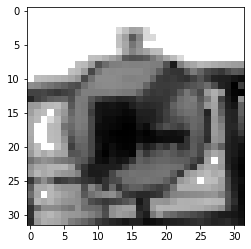

In [9]:
plt.imshow(array_to_img(X_train[31366]), cmap='gray')
plt.show()

# Include an exploratory visualization of the dataset

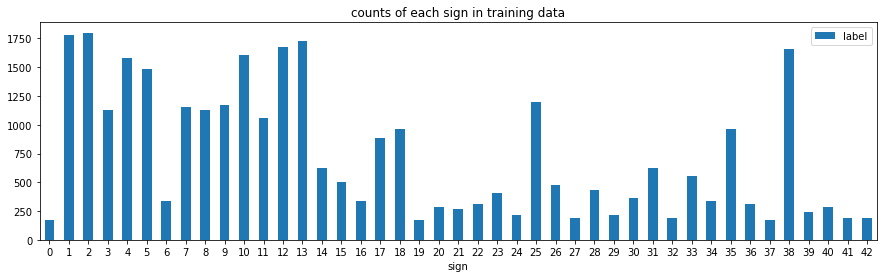

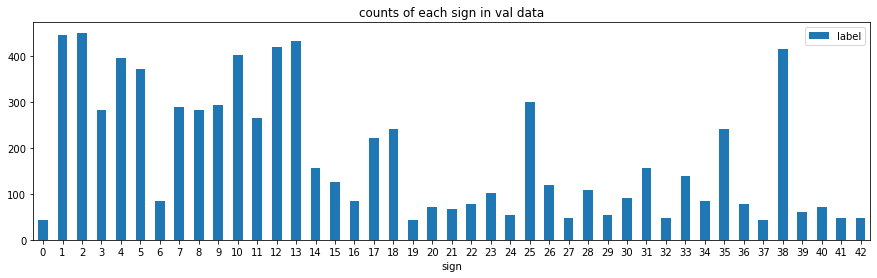

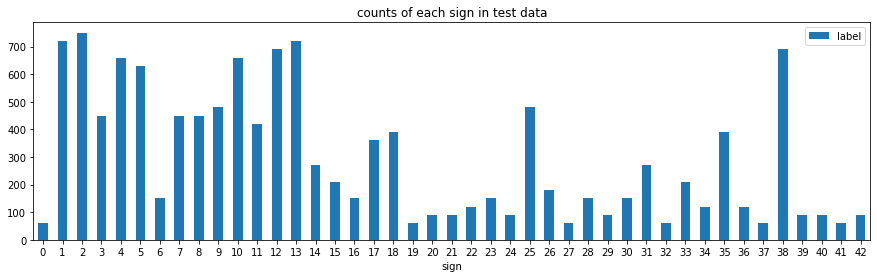

In [10]:
### Data exploration visualization code goes here.

# Plot Training / Test summary counts
for (data, name) in [[y_train, "training"], [y_val, "val"], [y_test, "test"]]:
    df = pd.DataFrame({'label': data})
    counts = df.groupby(['label']).agg({'label': 'count'})
    counts.plot(kind='bar', title="counts of each sign in %s data" % name, figsize=(15,4), rot=0)
    plt.xlabel("sign")
    plt.show()

In [11]:
    
# # Gather 5 Example images per label
# examples_per_sign = 5
# total = 0
# example = {}
# for (img,label) in zip(X_train, y_train):
#     example.setdefault(label, [])
#     if len(example[label]) < examples_per_sign:
#         example[label].append(img)
#         total += 1
#     if total == n_classes * examples_per_sign:
#         break;

# for label in sorted(example.keys()):
#     fig = plt.figure()
#     print(sign_names[label])
#     for i in range(examples_per_sign):
#         plt.subplot(1,examples_per_sign,i+1)
#         plt.imshow(example[label][i])
#     plt.show()

# Model

In [12]:
from keras.models import Sequential
# from keras.optimizers import adadelta_v2
from tensorflow.keras.optimizers import Adadelta
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, CSVLogger, Callback

In [13]:
def ImLeNet(X_train,Y_train):
    model=Sequential()
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),input_shape=(32,32,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten(data_format='channels_last'))
    
    model.add(Dense(500))
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    #打印参数
    model.summary()
    #编译模型
    model.compile(optimizer=Adadelta(learning_rate=1),loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [14]:
# 写一个LossHistory类，保存训练集的loss和acc
# 当然我也可以完全不这么做，可以直接使用model.fit()方法返回的 history对象去做
'''Callback有6个常用的方法，这里实现其中的四个
    def on_epoch_begin(self, epoch, logs=None):
    def on_epoch_end(self, epoch, logs=None):
    def on_batch_begin(self, batch, logs=None):
    def on_batch_end(self, batch, logs=None):
    def on_train_begin(self, logs=None):
    def on_train_end(self, logs=None):
'''
class LossHistory(Callback):  # 继承自Callback类
 
    '''
    在模型开始的时候定义四个属性，每一个属性都是字典类型，存储相对应的值和epoch
    '''
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    # 在每一个batch结束后记录相应的值
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
    
    # 在每一个epoch之后记录相应的值
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))
 
    def loss_plot(self, loss_type, figsize=(8,4), dpi=100):
        '''
        loss_type：指的是 'epoch'或者是'batch'，分别表示是一个batch之后记录还是一个epoch之后记录
        '''
        num = len(history.losses[loss_type])
        iters = range(num)
        
        fig, ax = plt.subplots(1,1, figsize=figsize, dpi=dpi)
        plt.xlim(0, num-1)
        plt.ylim(0, 1)
        ax.xaxis.set_major_locator(MultipleLocator(1))
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="center right")
        plt.savefig("mnist_keras.png")
        plt.show()

In [15]:
filepath="weights22.best.hdf5"
checkpoint= ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose=1, save_best_only=True)
csv_logger = CSVLogger('training22.log')
history = LossHistory()
callbacks_list= [checkpoint, history, csv_logger]

In [16]:
if __name__=="__main__":
    y_train = to_categorical(y_train, n_classes)
    y_val = to_categorical(y_val, n_classes)
    y_test = to_categorical(y_test, n_classes)
    
    model=ImLeNet(X_train,y_train)
    model.fit(x=X_train,y=y_train, batch_size=20,epochs=20,verbose=1,validation_data=(X_val,y_val),callbacks=callbacks_list)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 60)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 60)        240       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 60)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 60)        240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)       

31367/31367 [==============================] - 12s 369us/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0270 - val_accuracy: 0.9930

Epoch 00024: val_accuracy did not improve from 0.99668
Epoch 25/50
31367/31367 [==============================] - 12s 368us/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0262 - val_accuracy: 0.9938

Epoch 00025: val_accuracy did not improve from 0.99668
Epoch 26/50
31367/31367 [==============================] - 12s 372us/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0219 - val_accuracy: 0.9949

Epoch 00026: val_accuracy did not improve from 0.99668
Epoch 27/50
31367/31367 [==============================] - 12s 381us/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0222 - val_accuracy: 0.9953

Epoch 00027: val_accuracy did not improve from 0.99668
Epoch 28/50
31367/31367 [==============================] - 12s 376us/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0336 - val_accuracy: 0.9932

Epoch 00028: val_accuracy did not imp

In [17]:
loss,acc=model.evaluate(x=X_test,y=y_test)
print("loss:{}===acc:{}".format(loss,acc))

12630/12630 [==============================] - 2s 122us/step
loss:0.1474821766200685===acc:0.9755344390869141


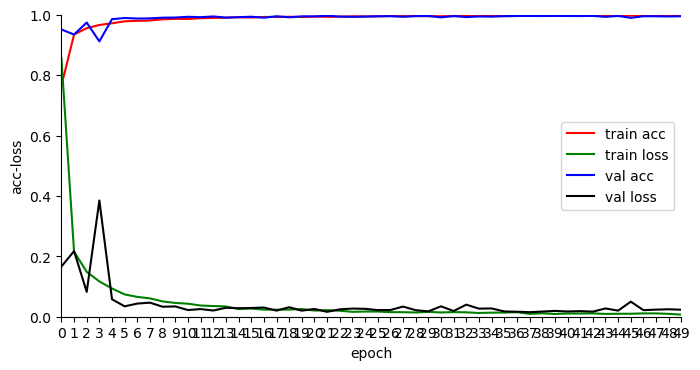

In [18]:
history.loss_plot('epoch')

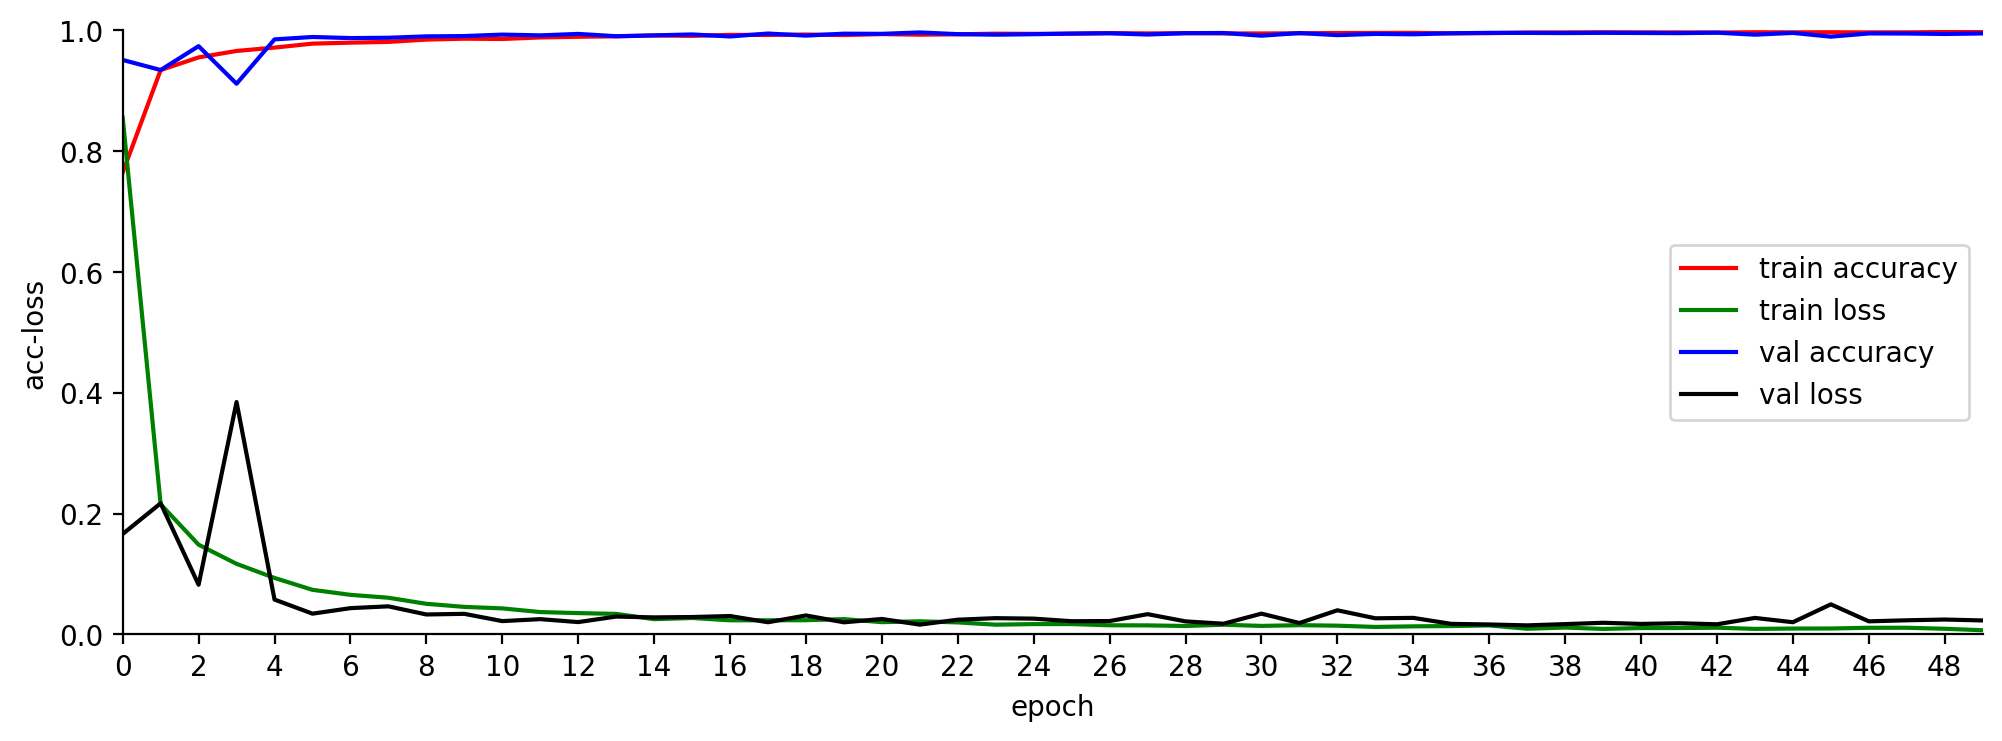

In [21]:
loss_type='epoch'
num = len(history.losses[loss_type])
iters = range(num)
fig, ax = plt.subplots(1,1, figsize=(12,4), dpi=200)
# plt.figure()

plt.xlim(0, num-1)
plt.ylim(0, 1)

ax.xaxis.set_major_locator(MultipleLocator(2))
# acc
ax.plot(iters, history.accuracy[loss_type], 'r', label='train accuracy')
# loss
ax.plot(iters, history.losses[loss_type], 'g', label='train loss')
    # val_acc
ax.plot(iters, history.val_acc[loss_type], 'b', label='val accuracy')
    # val_loss
ax.plot(iters, history.val_loss[loss_type], 'k', label='val loss')

# plt.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.xlabel(loss_type)
plt.ylabel('acc-loss')
ax.legend(loc="center right")
fig.savefig("mnist_keras.png")
plt.show()